Training Accuracy: 0.8778625954198473
Testing Accuracy: 0.8333333333333334
Accuracy:  0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.86      0.83      0.85        36

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66



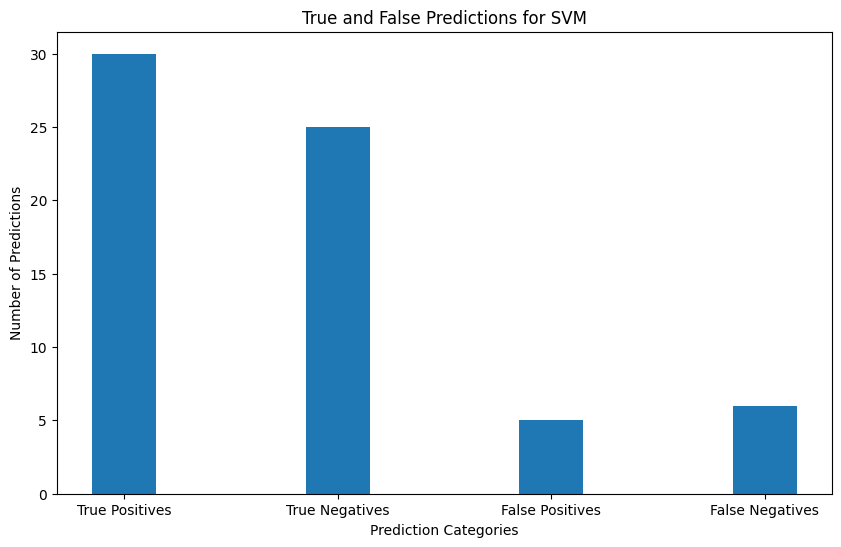

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart Disease Prediction/Heart Disease Dataset.csv")

# Check for missing values and fill with the mean value of each column
data.fillna(data.mean(), inplace=True)

# Convert continuous target variable into binary classes
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Prepare input and output data
features = ['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = data[features]
y = data['num']

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split the scaled features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rs = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=36, cv=5, random_state=42, n_jobs=-1)
rs.fit(X_train, y_train)
model = rs.best_estimator_

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate training and testing accuracy
acc_train = model.score(X_train, y_train)
print("Training Accuracy:", acc_train)

acc_test = model.score(X_test, y_test)
print("Testing Accuracy:", acc_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate F1 score, recall, and precision
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Plot the bar graph for true and false predictions
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
plt.figure(figsize=(10, 6))
plt.bar(categories, [tp, tn, fp, fn], width=0.3)
plt.xlabel('Prediction Categories')
plt.ylabel('Number of Predictions')
plt.title('True and False Predictions for SVM')
plt.show()